In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
os.chdir('/Users/lin/Desktop')

In [2]:
df=pd.read_excel('glass fiber content test.xlsx',sheetname=1,header=0)

In [3]:
data =df[['Content','Breakage','Percent','Type']]

In [4]:
int(len(data)/4)

12

In [5]:
data['seq'] = [1,2,3,4]*int(len(data)/4)

In [6]:
data.head(10)

,Content,Breakage,Percent,Type,seq
0,酸,1069.6,24.70,南京天元,1
1,酸,1204.3,23.35,南京天元,2
2,酸,1122.0,23.55,南京天元,3
3,酸,1201.7,25.00,南京天元,4
4,碱,1064.0,24.25,南京天元,1
5,碱,1104.0,23.05,南京天元,2
6,碱,1093.9,22.85,南京天元,3
7,碱,1056.9,29.35,南京天元,4
8,氧,822.8,18.90,南京天元,1
9,氧,879.6,18.25,南京天元,2


In [7]:
sp = data.Content.value_counts().index.tolist()
# data.Content.unique().tolist()
# data['Content'].unique().tolist()
# data.iloc[:,0].unique().tolist()

In [8]:
tp = data['Type'].unique().tolist()
tp[0]

'南京天元'

In [9]:
cum = []
cum1 = []
cums = []
for i in sp:
    data_i = data[data['Content']==i][data['Type']==tp[0]]
    data_ii = data[data['Content']==i][data['Type']==tp[1]]
    data_i_mean = data_i['Breakage'].mean() 
    data_ii_mean = data_ii['Breakage'].mean() 
#     print(data_i)
#     print(data_ii)
#     print(i)
    data_i_m_r = data_i_mean/1219.2*100
    data_ii_m_r = data_ii_mean/1223.7*100
#     print(data_i_mean)
#     print(data_ii_mean)
    cum.append(data_i_m_r) #'南京天元'各项断裂强力
    cum1.append(data_ii_m_r) #'四川华源'各项断裂强力
    cum_d = {'Retention':cum,'Content':sp}
    cum1_d = {'Retention':cum1,'Content':sp}


cum_re = pd.DataFrame(data=cum_d)
cum1_re = pd.DataFrame(data=cum1_d)


In [10]:
cum_re

,Content,Retention
0,温,101.332841
1,空,100.000000
2,酸,94.274934
3,折,92.048064
4,碱,88.558071
5,氧,73.037648


In [11]:
cum1_re

,Content,Retention
0,温,92.056877
1,空,100.000000
2,酸,73.147013
3,折,78.152325
4,碱,66.027213
5,氧,56.625398


In [12]:
con

NameError: name 'con' is not defined

TypeError: unsupported operand type(s) for &: 'str' and 'numpy.float64'

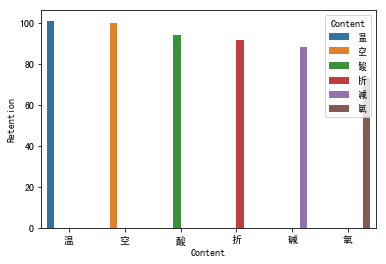

In [13]:
# plt.figure(figsize=(10,8))
ax1=sns.barplot('Content','Retention',hue='Content',data= cum_re)
# x=cum_re.index.tolist()
x=sp #给sp 进行数列化，并添加标签
y=cum_re['Retention']
for x,y in zip(x,y):
    plt.text(x,y,'%.1f'&y)

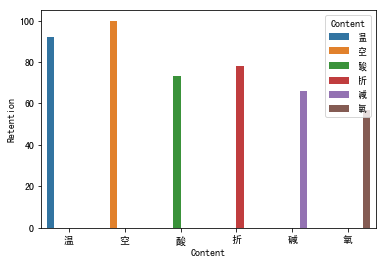

In [14]:
ax2=sns.barplot('Content','Retention',hue='Content',data= cum1_re)

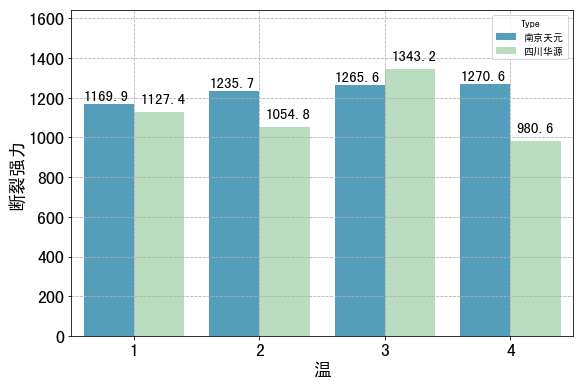

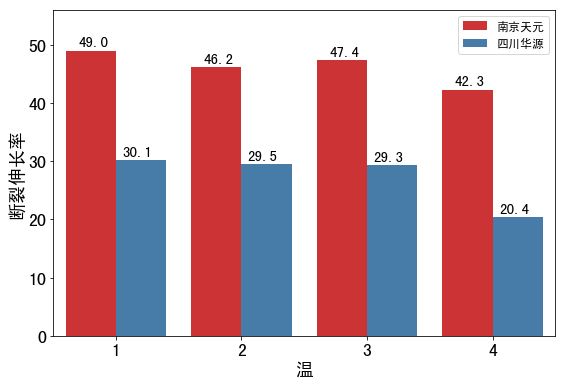

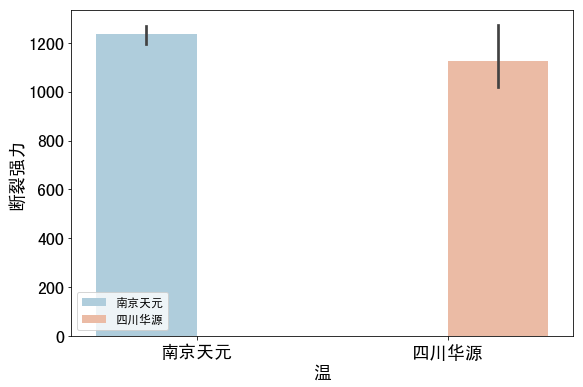

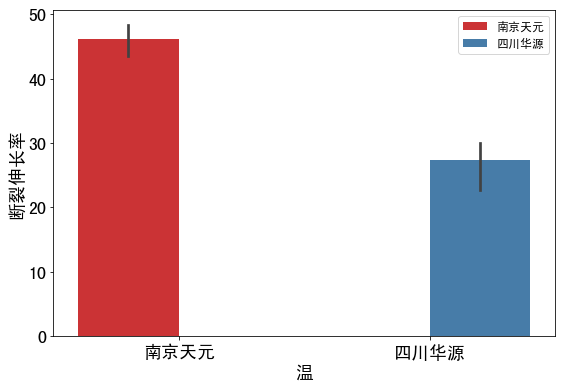

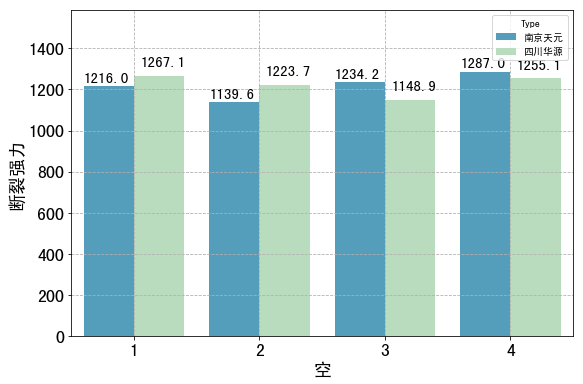

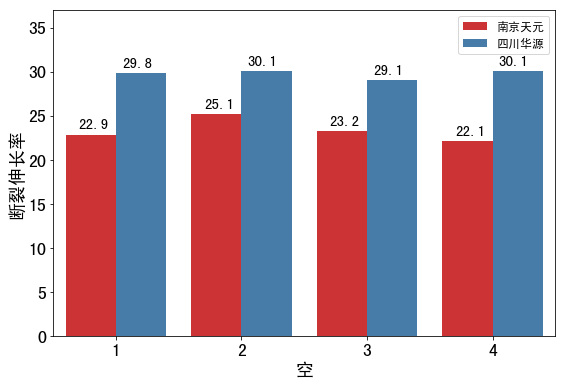

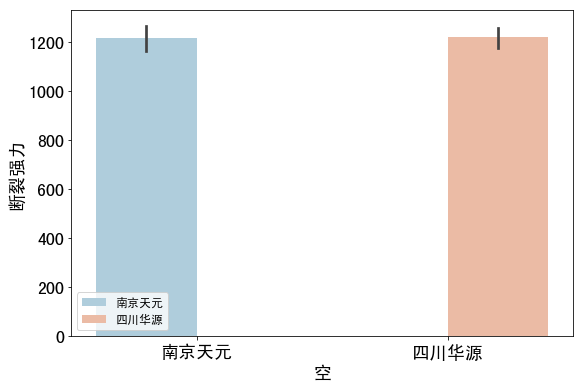

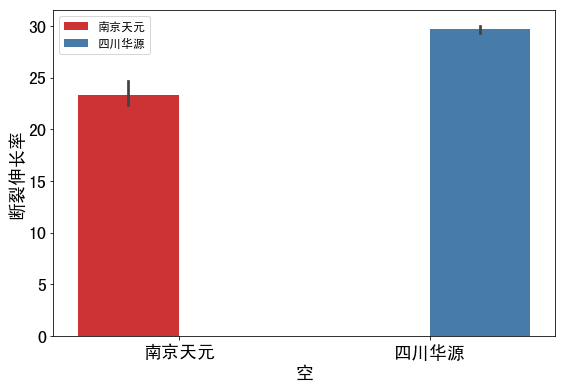

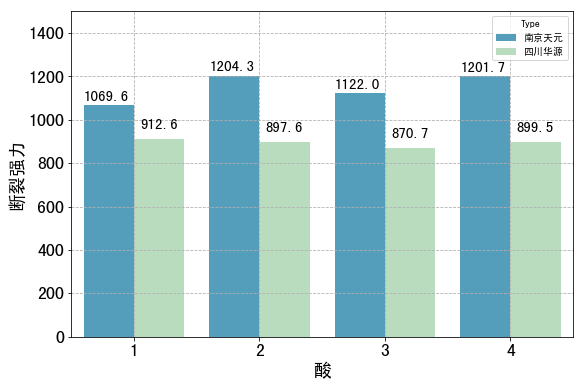

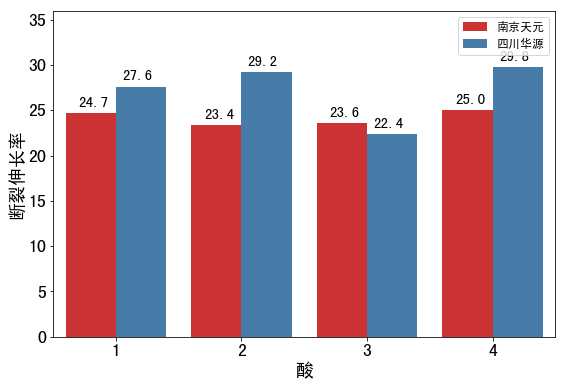

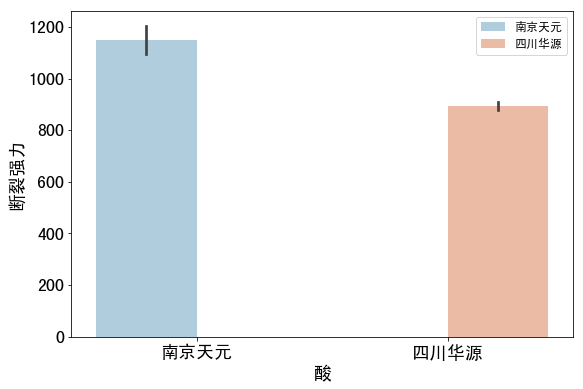

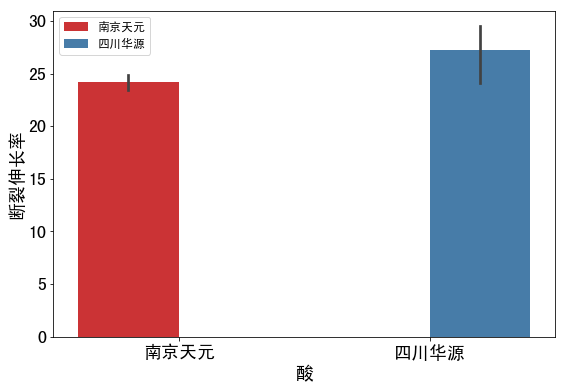

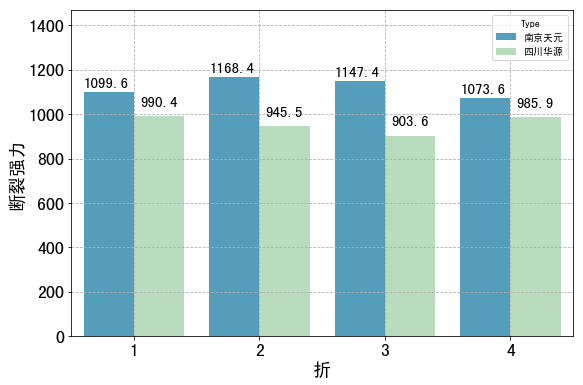

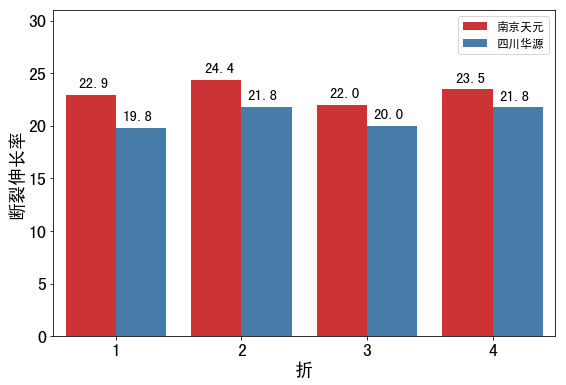

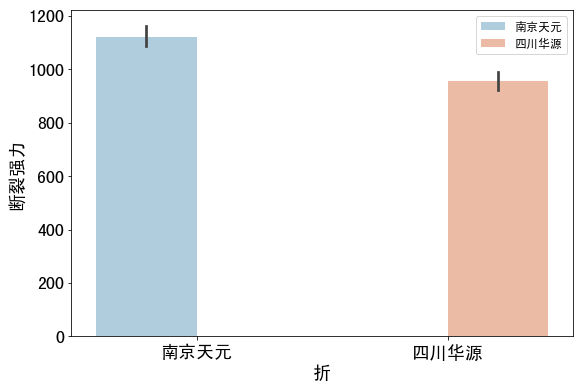

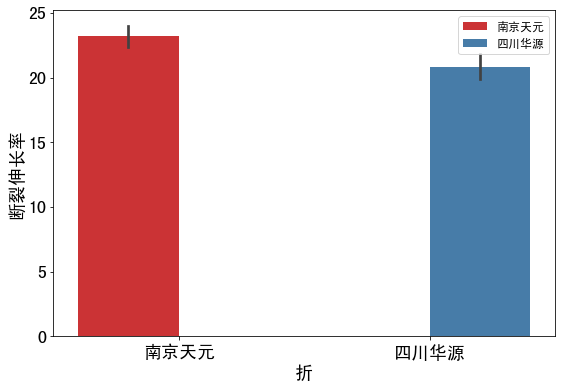

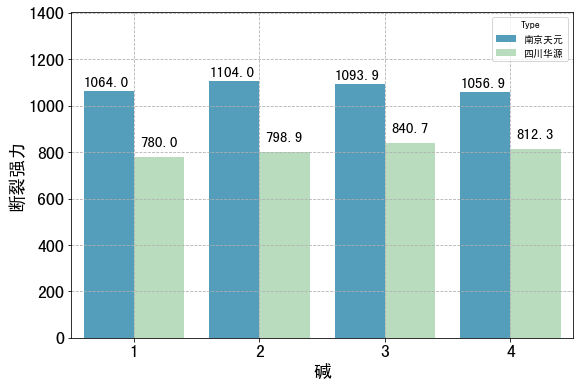

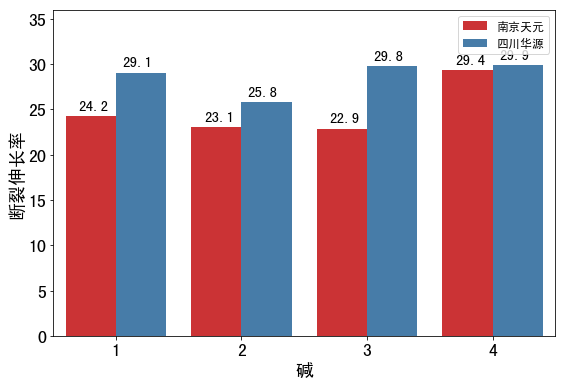

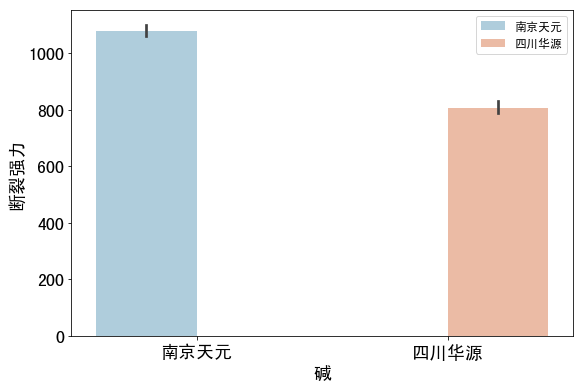

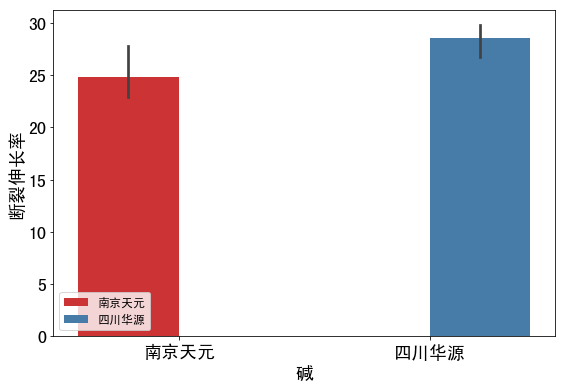

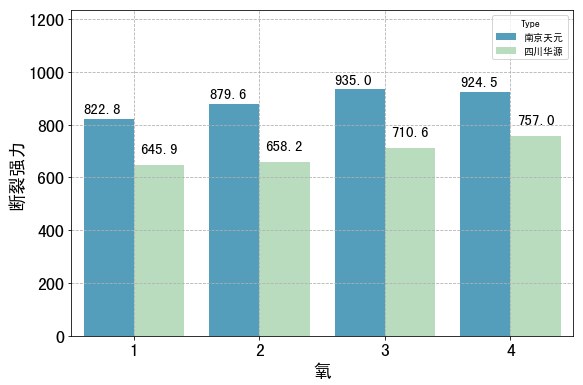

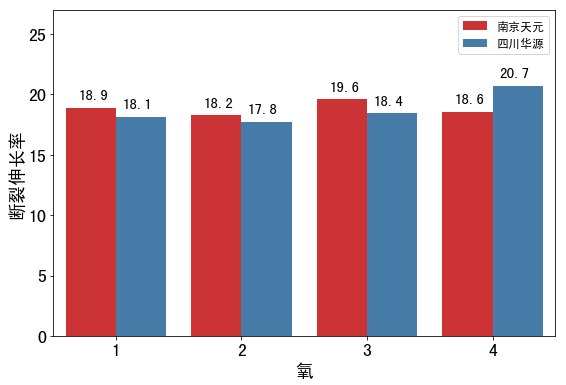

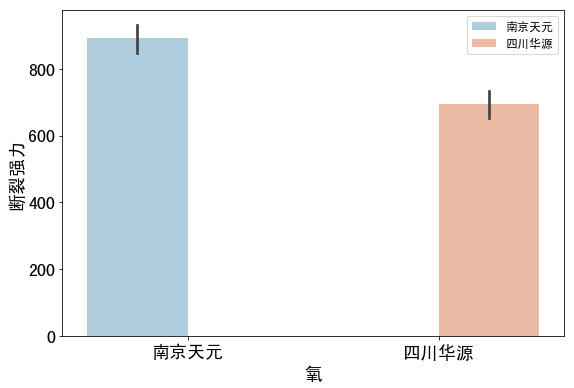

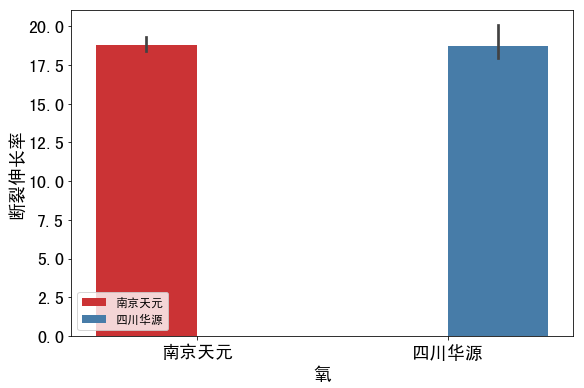

In [17]:
n=0
for i in sp:
    data_i = data[data['Content']==i]
#     print(data_i)
    plt.figure(figsize = (9,6))
    sns.barplot('seq','Breakage',hue='Type',data=data_i,palette="GnBu_r")
    
    x=data_i['seq'].astype(int)
    x1=data_i['seq'].astype(int)
    y=data_i['Breakage'][:4]
    y1=data_i['Breakage'][4:]
    for x,y in zip(x,y):
        plt.text(x-1.4,y+20,'%.1f'%y,fontsize=15)
    for x1,y1 in zip(x1,y1):
        plt.text(x1-0.95,y1+45,'%.1f'%y1,fontsize=15)
    
    
    plt.grid(linestyle='--')
    plt.xlabel(i,fontsize = 18)
    plt.ylabel('断裂强力',fontsize = 18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize=18)
    ax1.legend(fontsize = 12)
    plt.ylim(0,int(data_i.Breakage.max())+300)
    n+=1
    plt.savefig('%s_%i.jpg'%(i,n),dpi=100)
    
#########################################
    plt.figure(figsize=(9,6))
    ax1 = sns.barplot('seq','Percent',hue='Type',data=data_i,palette="Set1")
    
    x=data_i['seq'].astype(int)
    x1=data_i['seq'].astype(int)
    y=data_i['Percent'][:4]
    y1=data_i['Percent'][4:]
    for x,y in zip(x,y):
        plt.text(x-1.3,y+0.7,'%.1f'%y,fontsize=15)
    for x1,y1 in zip(x1,y1):
        plt.text(x1-0.95,y1+0.7,'%.1f'%y1,fontsize=15)
    
    plt.xlabel(i,fontsize = 18)
    plt.ylabel('断裂伸长率',fontsize = 18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize=18)
    ax1.legend(fontsize = 12)
    plt.ylim(0,int(data_i.Percent.max())+7)
    
    n+=1
    plt.savefig('%s_%i.jpg'%(i,n),dpi=100)
#########################################    
    plt.figure(figsize=(9,6))
    ax2 = sns.barplot('Type','Breakage',hue='Type',data=data_i,palette="RdBu_r")
    plt.xlabel(i,fontsize = 18)
    plt.ylabel('断裂强力',fontsize = 18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize=18)
    ax2.legend(fontsize = 12)
    
    n+=1
    plt.savefig('%s_%i.jpg'%(i,n),dpi=100)
#########################################    
#     plt.show()
    plt.figure(figsize=(9,6))
    ax3 = sns.barplot('Type','Percent',hue='Type',data=data_i,palette="Set1")
    plt.xlabel(i,fontsize = 18)
    plt.ylabel('断裂伸长率',fontsize = 18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize=18)
    ax3.legend(fontsize = 12)
    
    n+=1
    plt.savefig('%s_%i.jpg'%(i,n),dpi=100)
    
    plt.show()